# Exploratory Data Analysis

In this notebook we'll investigate our data features in more detail prior to building our recommendation engine. We'll examine frequency counts, distributions of continuous features, as well as relationships between features. Specifically, we'll look at the following cuts of the data:

- Distribution of Songs per Playlist
- Top Artists
- Top Genres
- Distribution of the Number of Genres Associated With Each Artist
- Audio Features (i.e. danceability, loudness, tempo, etc.)

### Importing Librabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Importing Main Dataset 

The df_combined data includes all track meta data, artist meta data, and audio features for every song in our track library

In [2]:
df_combined = pd.read_csv('../data/df_combined.csv')

In [3]:
df_combined.shape

(37028, 26)

In [4]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37028 entries, 0 to 37027
Data columns (total 26 columns):
Unnamed: 0               37028 non-null int64
track_id                 37028 non-null object
track_name               37023 non-null object
artist_id                37028 non-null object
artist_name              37023 non-null object
album_id                 37028 non-null object
album_name               37023 non-null object
playlist_id              37028 non-null object
track_popularity         37028 non-null float64
track_duration           37028 non-null float64
artist_popularity        37028 non-null int64
artist_follower_total    36966 non-null float64
danceability             31198 non-null float64
energy                   31198 non-null float64
key                      31198 non-null float64
loudness                 31198 non-null float64
mode                     31198 non-null float64
speechiness              31198 non-null float64
acousticness             31198 non-nul

In [5]:
df_combined.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'artist_id', 'artist_name',
       'album_id', 'album_name', 'playlist_id', 'track_popularity',
       'track_duration', 'artist_popularity', 'artist_follower_total',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'artist_genres', 'related_artist_names', 'playlist_name'],
      dtype='object')

In [6]:
df_combined.head()

,Unnamed: 0,track_id,track_name,artist_id,artist_name,album_id,album_name,playlist_id,track_popularity,track_duration,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_genres,related_artist_names,playlist_name
0,0,7DQ5CZjAQdhgDgdnSXxJ7Z,Solid Gold,6n28c9qs9hNGriNa72b26u,PNAU,3g0mfsWlOOUNheV5L3kQKs,Solid Gold,37i9dQZF1DX4dyzvuaRJ0n,58.0,208367.0,...,0.0,0.0541,0.0978,0.000001,0.0836,0.2950,104.983,"['alternative dance', 'aussietronica', 'austra...","['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint
1,1,5p1ex0pXv6jSPJ6QbumQpD,Piece Of Your Heart,0xRXCcSX89eobfrshSVdyu,MEDUZA,0agqVZjOqVtqHkq3pTFPXb,Piece Of Your Heart,37i9dQZF1DX4dyzvuaRJ0n,87.0,152913.0,...,0.0,0.0295,0.0404,0.000160,0.0740,0.6310,124.080,[],"['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint
2,2,1ahVFh0ViDZr8LvkEVlq3B,No Sleep (feat. Bonn),60d24wfXkVzDSfLS6hyCjZ,Martin Garrix,7KJTuTXYSnBGNgAxte3CSg,No Sleep (feat. Bonn),37i9dQZF1DX4dyzvuaRJ0n,84.0,207094.0,...,1.0,0.0326,0.1290,0.000000,0.1210,0.3270,128.133,"['big room', 'edm', 'pop', 'progressive house'...","['AREA21', 'Borgeous', 'KSHMR', 'Dimitri Vegas...",mint
3,3,6nDKrPlXdpomGBgAlO7UdP,SOS,1vCWHaC5f2uS3yhpwWbIA6,Avicii,7Jx7doYIXITyR2LQB0Hvbc,SOS,37i9dQZF1DX4dyzvuaRJ0n,95.0,157202.0,...,0.0,0.0715,0.2720,0.000000,0.1190,0.3760,100.001,"['big room', 'dance pop', 'edm', 'pop']","['Alesso', 'Afrojack', 'Swedish House Mafia', ...",mint
4,4,5TL9e2xgtvJFtNCBsq1CgX,Changa - Blanke Remix,6n28c9qs9hNGriNa72b26u,PNAU,5kwv2A2qAK8pN007hSA56t,Changa,37i9dQZF1DX4dyzvuaRJ0n,59.0,188470.0,...,1.0,0.0431,0.0330,0.119000,0.2720,0.0654,110.086,"['alternative dance', 'aussietronica', 'austra...","['Eye of the Enemy', 'Cypecore', 'Rise to Fall...",mint


Dropping duplicate index column

In [7]:
df_combined.drop('Unnamed: 0', axis = 1, inplace=True)

## Data Overview

The below data dictionary will describe the features associated with 37K songs in our corpus

| Feature | Description | Type |
| --- | --- | --- |
| track_id | unique track identifier | str |
| track_name | track name | str |
| artist_id | unique identifier for an artist | str |
| artist_name | artist name | str |
| album_id | unique album identifier | str |
| album_name | name of the album | str |
| playlist_id | id of the playlist the track is from | str |
| playlist_id | id of the playlist the track is from | str |
| playlist_name | id of the playlist the track is from | str |
| track_popularity | measure of the popularity of the track | float (0 - 100)|
| track_duration | track duration in milliseconds | float |
| artist_popularity | measure of the popularity of the artist | int (0 - 100)|
| artist_follower_count | total Spotify followers (at time of data retrieval) | float |
| danceability | measure of how danceable a track vs not | float (0.0 - 1.0) |
| energy | perceptual measure of the intensity/ activity of a song | float (0.0 - 1.0 |
| key | measure mapping to the overall pitch of the song using standard Pitch Class notation | float (0.0 - 11.0 |
| loudness | avg. loudness in decibels | float (-60 - 0) |
| mode | indicates the modality (major or minor) of a track | float (0.0 = minor, 1.0 = major)|
| speechiness | probability/confidence that a track consists purely of speech and has no musical sounds (i.e. podcasts, talk shows, etc.) | float (0.0 - 1.0 |
| acousticness | probability/confidence that a track is purely acoustic | float (0.0 - 1.0 |
| instrumentalness | probability/confidence that a track is purely instrumental | float (0.0 - 1.0 |
| liveness | probability/confidence that a track was performed live (an audience is detected) | float (0.0 - 1.0 |
| valence | subjective measure of the 'mood' of the track. | float (0.0 = Sad/Angry, 1.0 = Happy/Euphoric) |
| tempo | avg. beats per minute | float |
| artist_genres | list of genres associated with the track's artist | str |
| related_artist_names | list of artist names associated with the track's artist | str |

## Songs per Playlist

Let's look at the number of songs per playlist

In [8]:
df_combined.playlist_name.value_counts(ascending = False)

Hip-Hop Drive                          100
I Love My '90s Hip-Hop                 100
Lush Lofi                              100
White Noise                            100
mint Acoustic                          100
Country's Greatest Hits:  The '80s      99
Retro Pop                               99
Country's Greatest Hits:  The '90s      99
Classical Romance                       98
Dance Classics                          98
Chill Instrumental Beats                98
Bedroom Pop                             97
Dance Rising                            97
Lava Lamp                               96
Trance Mission                          96
Acoustic Hits                           96
Sax and the City                        96
Bass Arcade                             95
Your Favorite Coffeehouse               95
From Beginning To End:  Johnny Cash     95
Dance Rewind                            95
12" Classics                            94
Epic & Melodic                          94
Guilty Plea

One interesting observation is that we have a number of "Country's Greatest Hits" playlist with very large number of songs. We also see that we have a Johnny Cash related playlist which we'll want to remove as we've done in previous notebooks.

We can use the `.describe()` method to examine this distribution in more detail

In [9]:
df_combined.playlist_name.value_counts().describe()

count    734.000000
mean      50.446866
std       21.761683
min        2.000000
25%       36.000000
50%       48.000000
75%       65.000000
max      100.000000
Name: playlist_name, dtype: float64

The mean number of tracks is 50. We see that the min number of tracks is 2. We'll want to take a look at playlist with usually low song counts

''

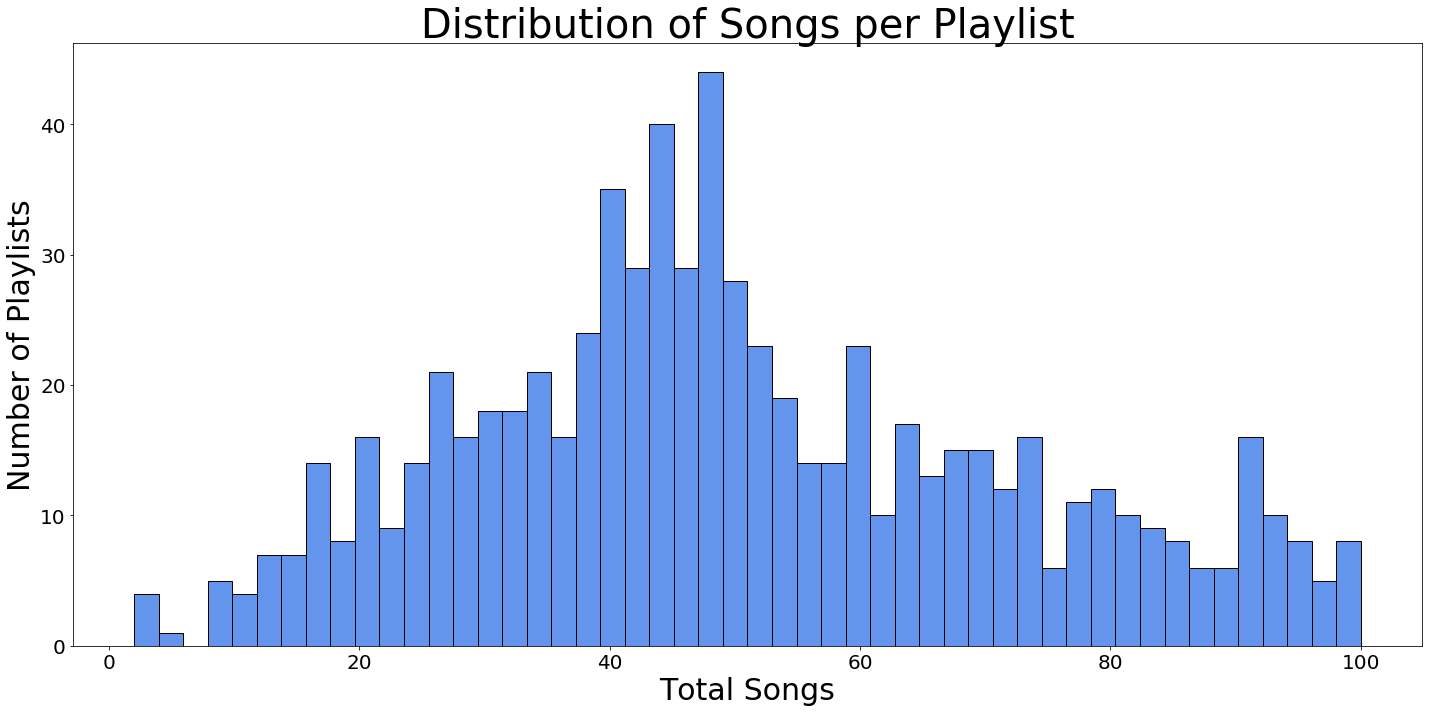

In [10]:
plt.figure(figsize=(20,10))
plt.hist(df_combined.playlist_name.value_counts(ascending = False), 
         bins=50, color='cornflowerblue', ec='k')
plt.title('Distribution of Songs per Playlist', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Total Songs',fontsize=30)
plt.ylabel('Number of Playlists', fontsize=30)
# plt.axvline(df_combined.playlist_name.value_counts(ascending = False).mean())
plt.tight_layout()
# Saving the image
# plt.savefig('../images/eda_word_count.png')
;

We can see the distribution is roughly normally distributed with a mean/median around 50.

In [11]:
# df_combined[df_combined['playlist_name'].str.contains("Country's Greatest Hits")]['playlist_name'].unique()


In [12]:
# df_combined[df_combined['playlist_name'].str.contains("Country's Greatest Hits")]['playlist_name'].value_counts()


#### Removing Artist Specific Playlist

Next we'll remove the Johnny Cashe specific playlist from the song corpus

In [13]:
df_combined.drop(df_combined[df_combined['playlist_name'] == 'From Beginning To End:  Johnny Cash'].index
                 , axis = 0
                ,inplace=True)


## Top Artists

In [29]:
df_combined['artist_name'].value_counts(ascending = False).head(20)

Lady Gaga                        50
Drake                            47
Kanye West                       45
Armin van Buuren                 41
Don Schlitz                      39
Luis Miguel                      30
Johann Sebastian Bach            29
Mark Morton                      29
Khalid                           29
The Beatles                      29
Hozier                           28
George Strait                    27
Tiësto                           26
Stevie Wonder                    26
Marvin Gaye                      26
Above & Beyond                   26
Aretha Franklin                  25
Ed Sheeran                       25
Calvin Harris                    25
Chief Commander Ebenezer Obey    25
Name: artist_name, dtype: int64

As expected, we can see that the top artists are big names like Lady Gaga, Kanye West, and Drake. We'll plot this to see it visually

''

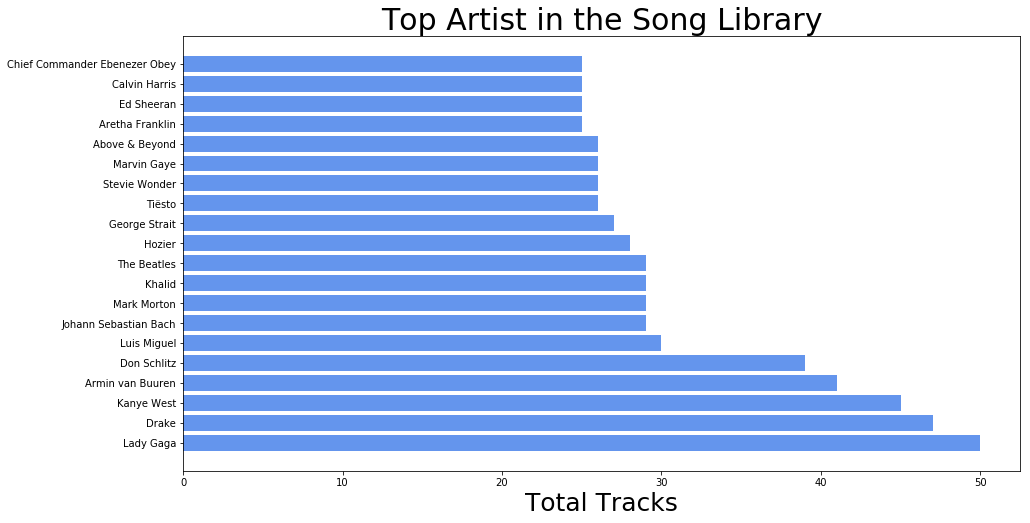

In [35]:
# Create a figure.
plt.figure(figsize=(15,8))

plt.barh(df_combined['artist_name'].value_counts(ascending = False).head(20).index
         ,df_combined['artist_name'].value_counts(ascending = False).head(20)
         , color='cornflowerblue')
plt.title('Top Artist in the Song Library', fontsize=30)
plt.xlabel('Total Tracks', fontsize=25)
plt.xticks()
# plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# plt.axvline(x=train_clean['saleprice'].median(),c='orange')
;
# Saving the image
# plt.savefig('../images/top_artists.png');

In [15]:
df_combined['artist_name'].value_counts().describe()

count    18428.000000
mean         2.003907
std          2.240126
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: artist_name, dtype: float64

## Genres Associated with Each Artist

Our first recommendation engine will be based on the genres associated with each artist in our corpus. As an artist can can be associated with a number of genres, we'll examine the distribution of the number of genres per artist in the corpus

We can briefly look at the top genre combinations to remind ourselves how the data is structured

In [36]:
df_combined[df_combined.artist_genres != '[]']['artist_genres'].value_counts().head(15)

['focus']                                                                           330
['chillhop', 'lo-fi beats']                                                         250
['contemporary country', 'country', 'country road', 'modern country rock']          163
['lo-fi beats']                                                                     150
['contemporary country', 'country', 'country road']                                 142
['k-pop']                                                                            95
['dance pop', 'pop', 'post-teen pop']                                                84
['chillhop', 'jazz boom bap', 'lo-fi beats']                                         82
['pop']                                                                              76
['country pop']                                                                      74
['dance pop', 'pop']                                                                 71
['regional mexican pop']        

We see that we have 5100 songs in the corpus where the artist genre list is blank. We'll want to remove these records prior to bulding our recommendation engine that is genre based

First we'll need to convert our genre list back to a Python list, currently it is a string containing a list

In [17]:
import ast

df_combined['artist_genres_list'] = df_combined['artist_genres'].map(lambda x: ast.literal_eval(x))

Next we'll need to create a new field that counts the number of genres associated with that artist

In [18]:
df_combined['genres_length'] = df_combined['artist_genres_list'].map(lambda x: len(x))

Creating histogram of Genre Length

In [19]:
genre_length_mask = df_combined['genres_length'] > 0

''

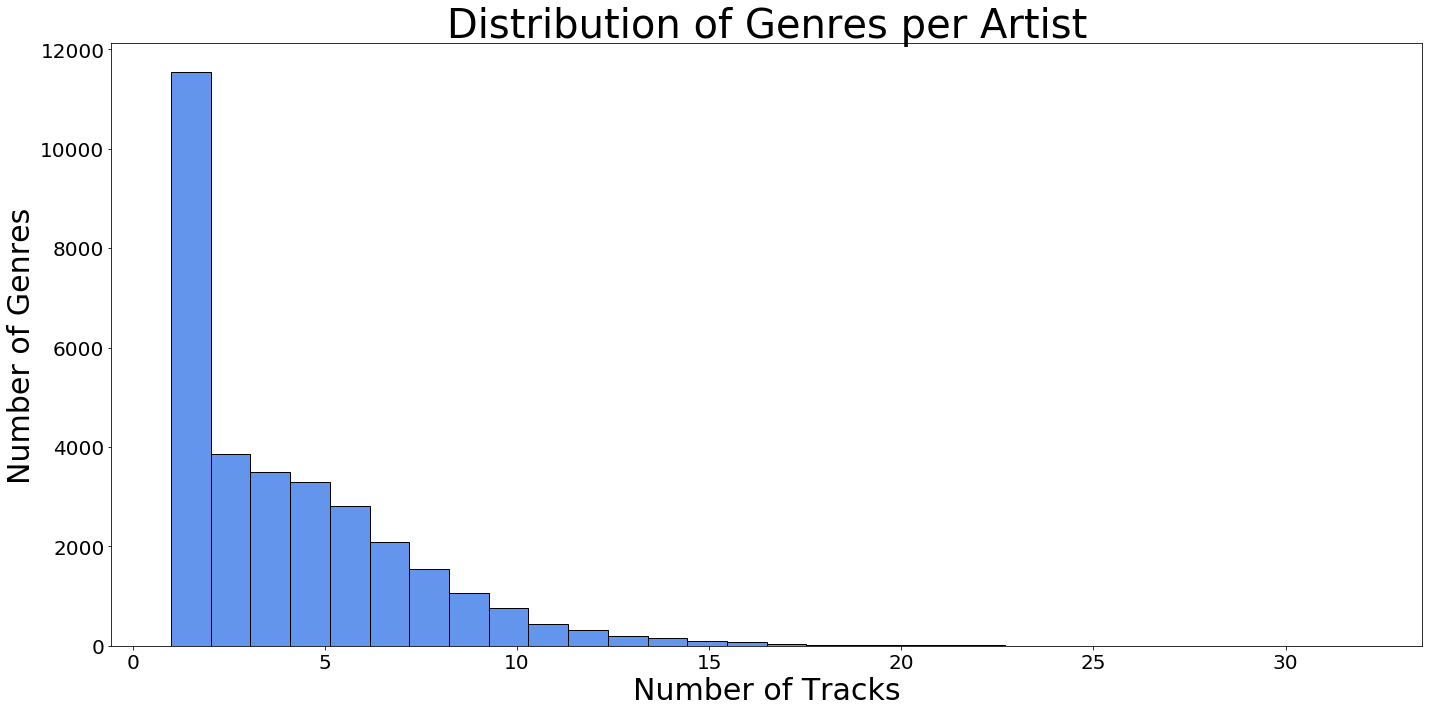

In [43]:
plt.figure(figsize=(20,10))
plt.hist(df_combined[genre_length_mask]['genres_length'], 
         bins=30, color='cornflowerblue', ec='k')
plt.title('Distribution of Genres per Artist', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Tracks',fontsize=30)
plt.ylabel('Number of Genres', fontsize=30)
# plt.axvline(df_combined.playlist_name.value_counts(ascending = False).mean())
plt.tight_layout()
# Saving the image
# plt.savefig('../images/genres_per_artist.png')
;

We can see the majority of artist have one genre associated with them, but the distribution is certainly right skewed with a long tail

We can use the `.describe()` method to see this in more detail

In [21]:
df_combined[genre_length_mask]['genres_length'].describe().round()

count    31833.0
mean         4.0
std          3.0
min          1.0
25%          2.0
50%          4.0
75%          6.0
max         32.0
Name: genres_length, dtype: float64

The mean genres is 4 per artist. As oone of our recommendation systems will be based on genre similarity, we'll likely see that artist that share 2 or more genres will have highest similarity scores

## Track Features EDA

Next we'll examine the audio features associated with the tracks in our song library

We'll start by creating some maks that we'll use to filter the dataframe

In [22]:
track_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                 'track_popularity', 'artist_popularity', 'artist_follower_total']

binary_probs = ['speechiness',
       'acousticness', 'instrumentalness', 'liveness']

continuous_features = ['danceability', 'energy', 'key', 'loudness',  'valence', 'tempo',]

The below function will create histograms for a subset of features in the dataframe

In [23]:
# Code adapted by Douglas Strodtman and Daniel Kim

def subplot_histogram(dataframe, list_of_columns, figsize_height = 60):
        nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
        fig, ax = plt.subplots(figsize=(20,figsize_height),nrows=nrows, ncols=2) 
        ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
        for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
            ax[i].hist(dataframe[column], color= 'cornflowerblue' )
            ax[i].set_title(f'{list_of_columns[i]}', fontsize = 30)
            ax[i].set_ylabel('Frequency', fontsize = 30)
#             ax[i].set_xlabel(list_of_columns[i], fontsize = 18)
            ax[i].tick_params(axis='x',labelsize=18)
            ax[i].tick_params(axis='y',labelsize=18)
        plt.tight_layout();

#### Audio Features - Probability Distributions

There are a number of track features that measure the probability/confidence that a track has a given attribute. For example, `speechiness` is the predicted probability that a track is compromised entirely of spoken words and no music (i.e. podcasts). A zero would indicate the track has a 0.0% probability of being entirely speech, thus we are 100% confident that it contains music.

Below we'll examine the histograms of these features derived from binary predicted probabilities. These features include:
- `speechiness`
- `acousticness`
- `instrumentalness`
- `liveness`

/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/davidbickham/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


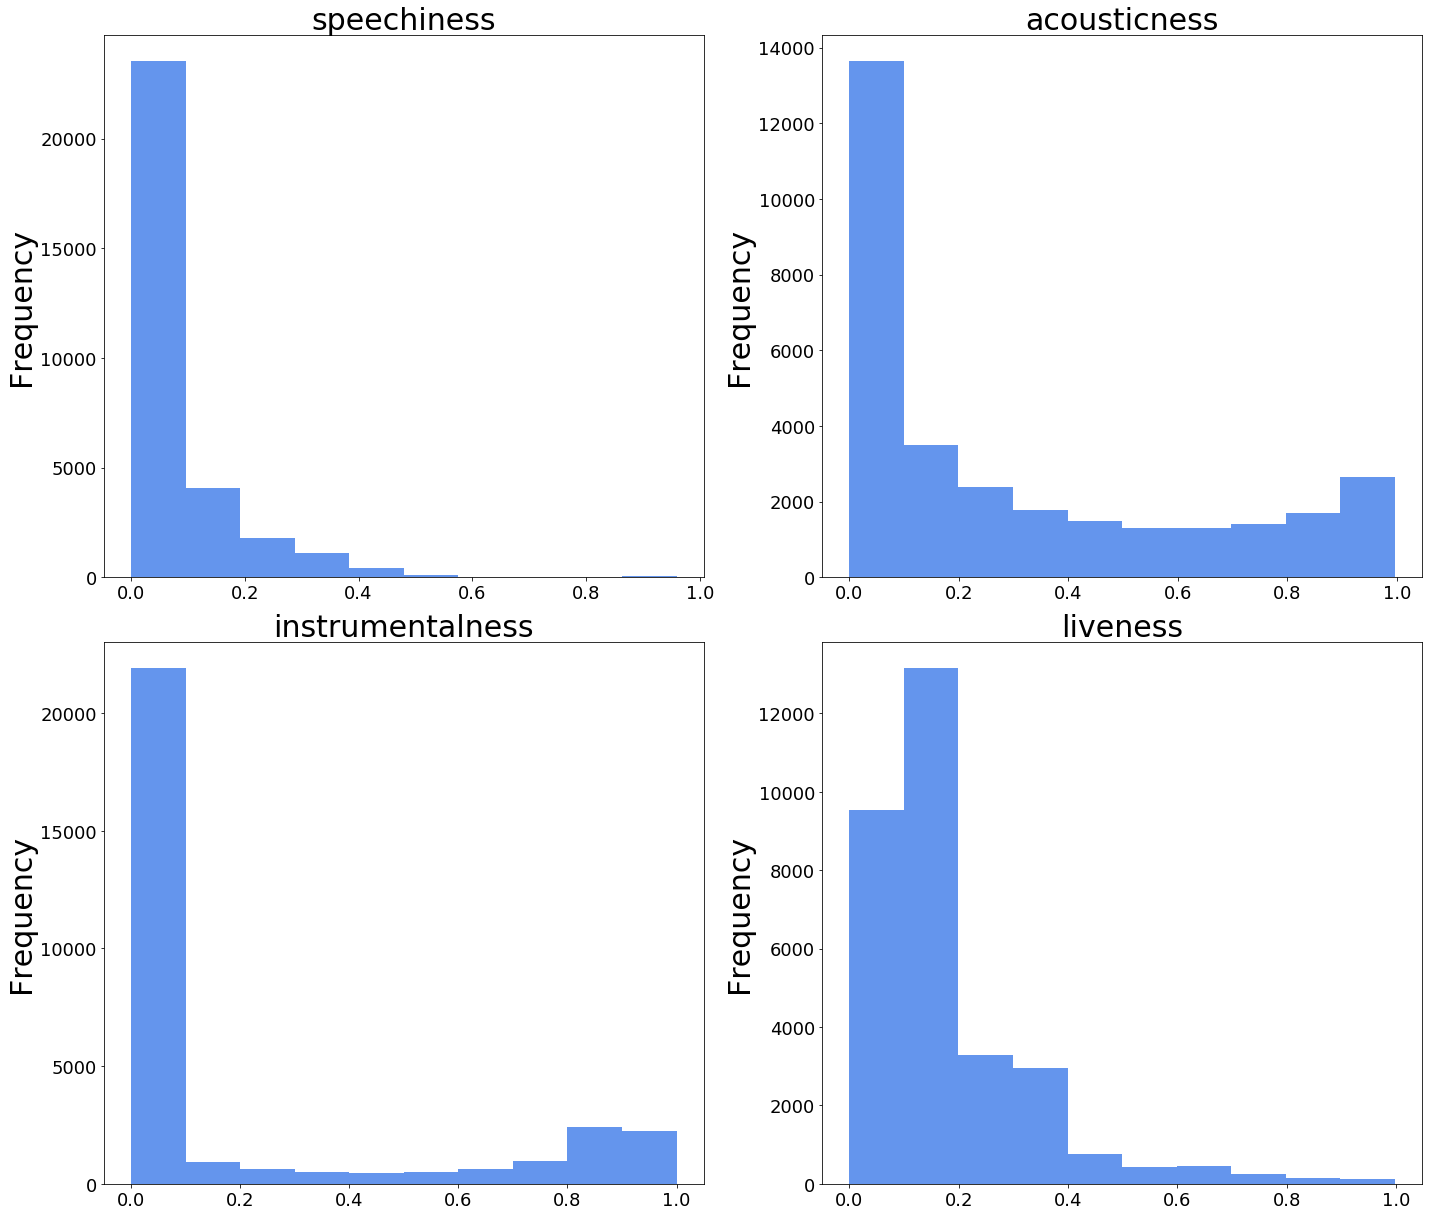

In [24]:
subplot_histogram(df_combined, binary_probs, figsize_height=17)

Based on the plot, there are several interesting distributions to note:

- In general, we have a spike in the predicted probabilities in the 0.0 - 0.2 which means that we are more confident in identifying tracks that are not fully acoustic for example

- Conversely, we see that each distribution is right skewed, which suggests that we are far less confident in predicting that a song is 100% associated with the respective attribute

- This is particularly evident `liveness`, where it's evident when a track doesn't have the presence of a life audience but there a few tracks that we are strongly confident were performed live

### Audio Features - Continuous Features

Next we'll examine the rest of our continuous audio features. Many of these (not all) are on a scale from 0.0 - 1.0 including:

- `danceability`
- `energy`
- `key`
- `loudness`
- `valence` 
- `tempo`

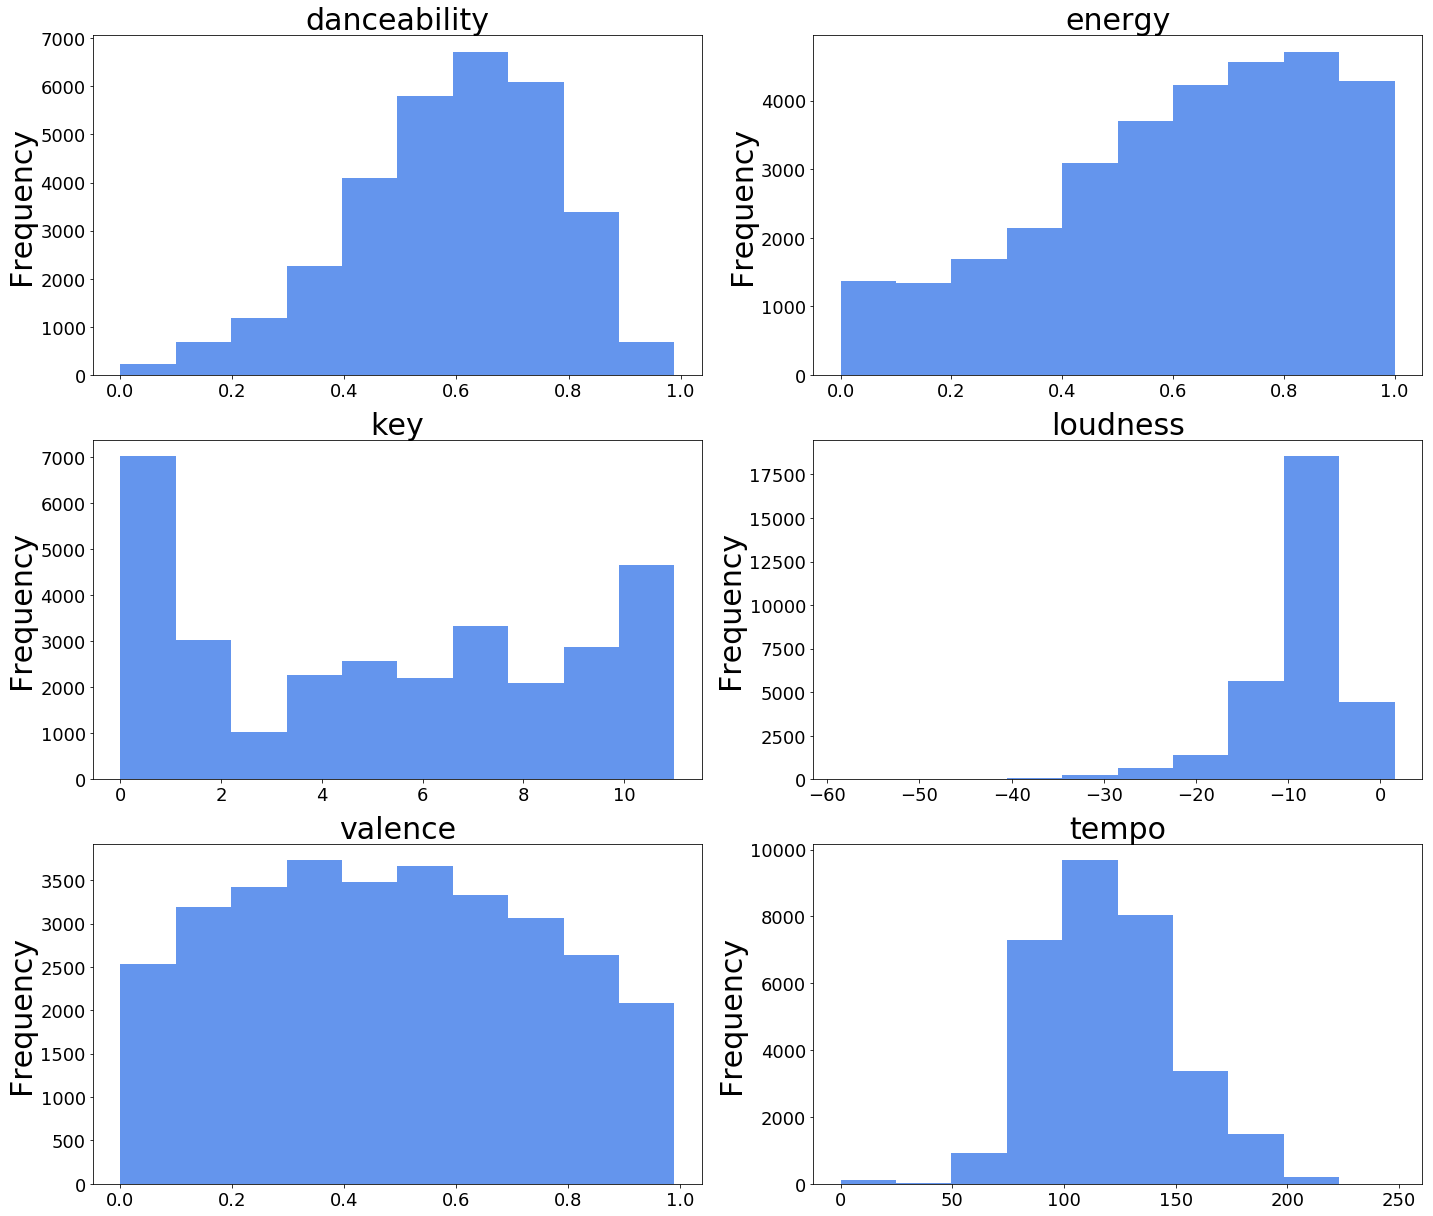

In [25]:
subplot_histogram(df_combined, continuous_features, figsize_height=17)

**Key Takeaways:**

- We see the least variance in the `valence` which is the subjective measure of wheher the mood of the track is positive/negative. This suggests most tracks are not overly postive/euphoric or overly sad

- We see that `danceability` and `tempo` have a more normal distribution, though the tempo (beats per minute) seems to be centered around 100-150 for most songs

- The track `energy` (measure of intensity/activity) is left skewed, indicating that most tracks tend to having higher energy levels

### Examaning Feature Correlations

Next we'll examine how track features are correlated with one another by utilizing a heatmap.

A heatmap is the visual representation of a correlation matrix. A correltation matrix displays the strength and direction of the linear relationship between features. This is quantified through the pearson correlation coefficient.

In addition to the track features themselves, we'll also pass data like the `track_popularity` and `artist_popularity` scores to see if popularity is associated with particularly kinds of music (i.e. are highly danceable songs generally more popular?)

''

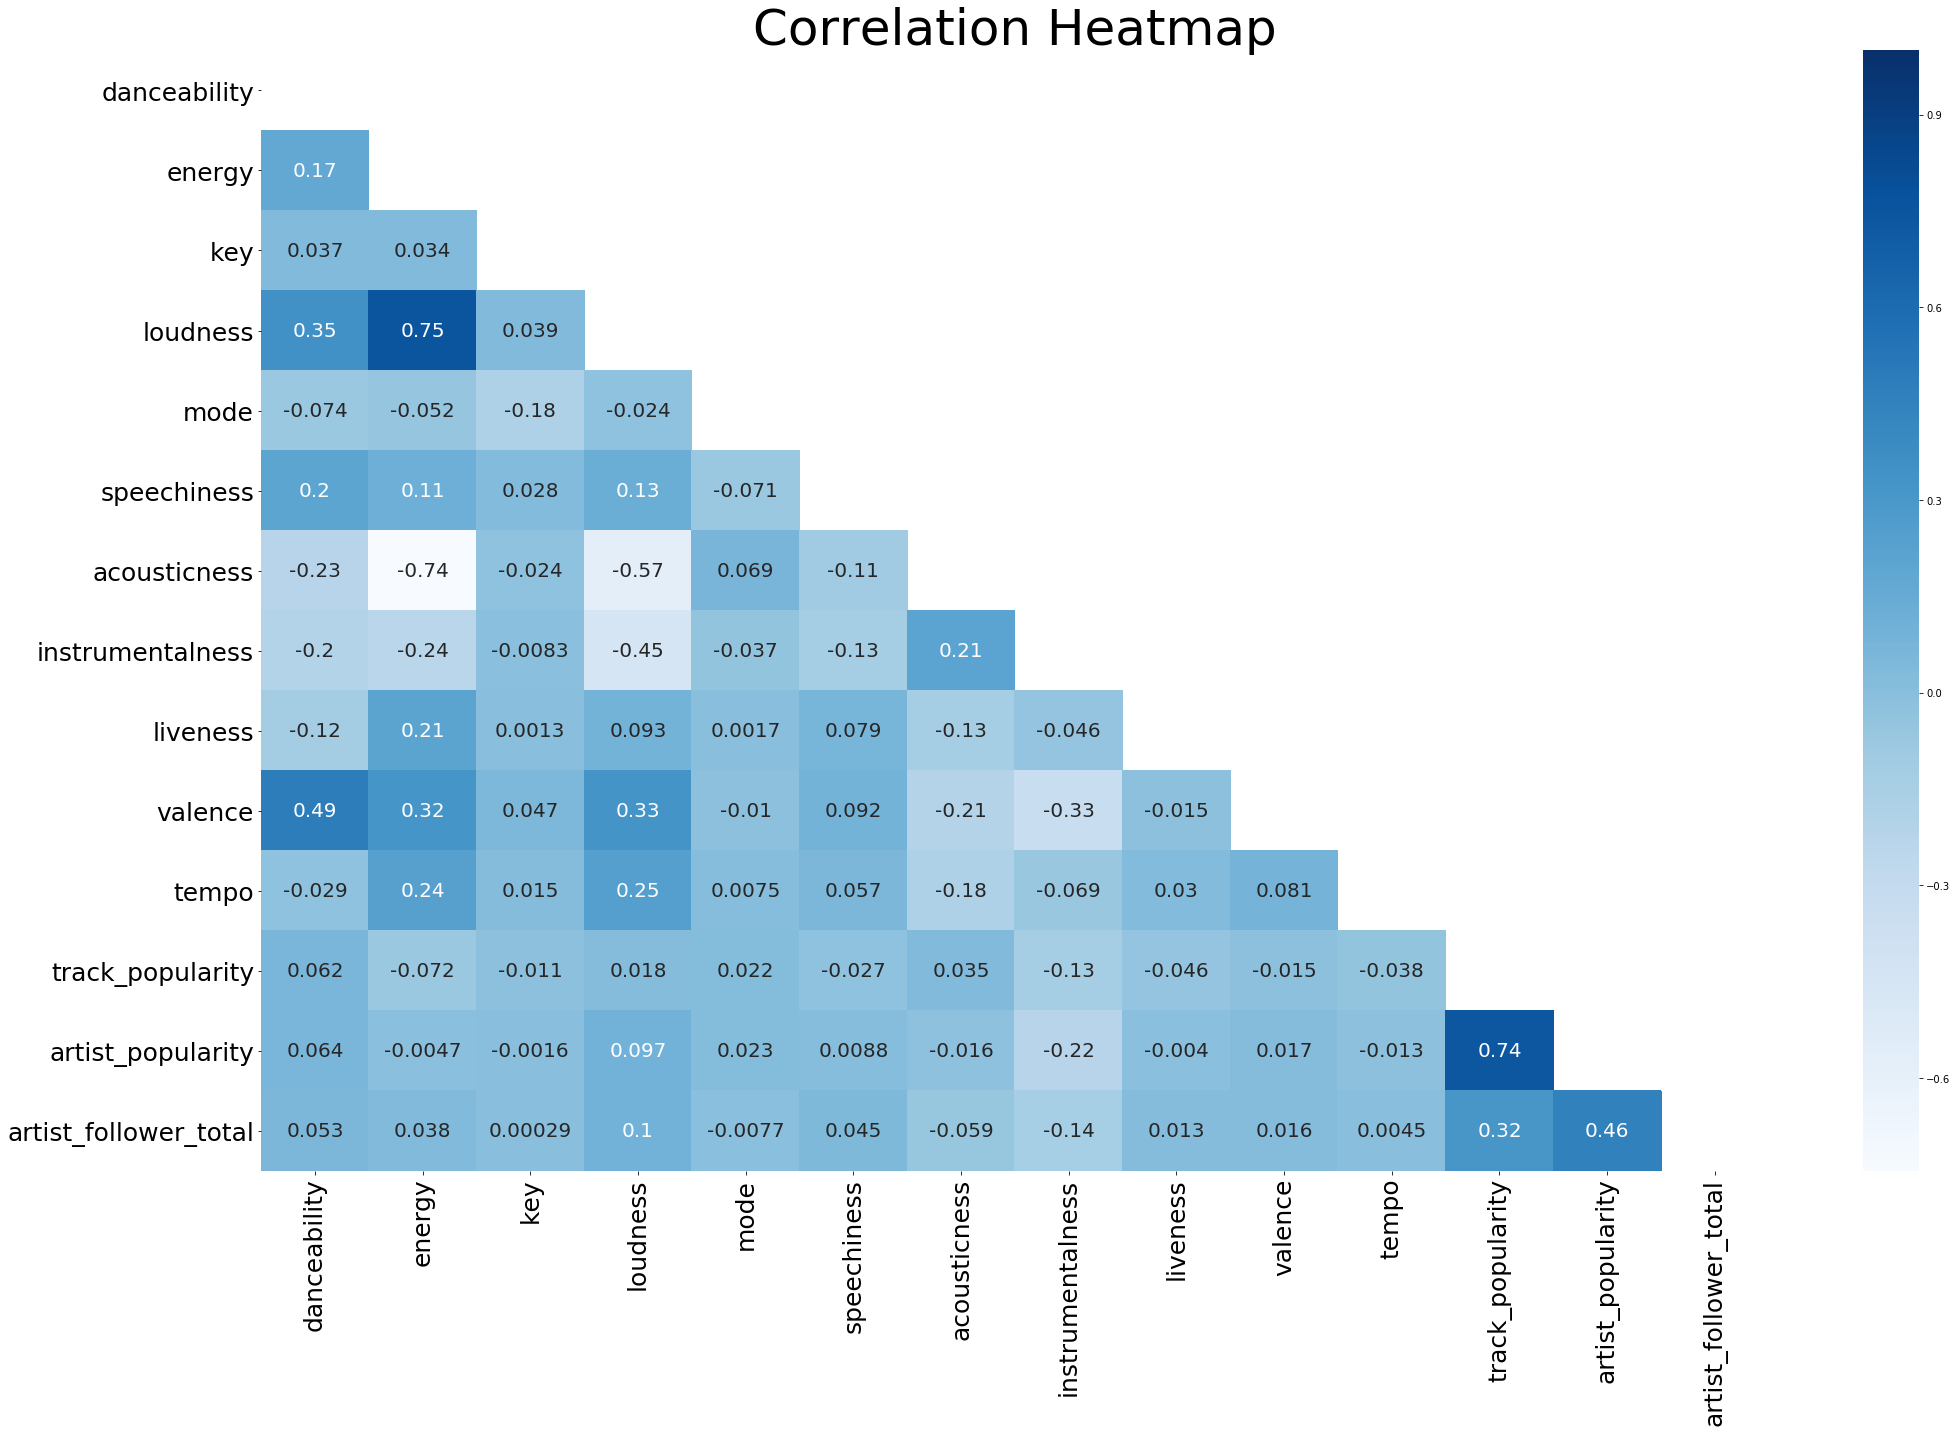

In [52]:
# Generate a heatmap in seaborn.
# This code is pulled from https://seaborn.pydata.org/generated/seaborn.heatmap.html.

# Set the default matplotlib figure size:
fix, ax = plt.subplots(figsize=(30,20))

# Generate a mask for the upper triangle.
mask = np.zeros_like(df_combined[track_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df_combined[track_features].corr(), 
                 mask=mask, 
                 ax=ax,
                 annot=True,
                annot_kws={"size": 20},
                cmap="Blues")

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=25)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=25)
ax.set_title('Correlation Heatmap', fontsize = 50)
plt.xticks(rotation = 90)
plt.tight_layout()

# Saving the image
# plt.savefig('../images/heatmap.png')
;

**Key Takeaways:**

- First we see that none of the track features are strongly correlated with `artist_popularity` and `track_popularity` which tells us intuitively that popular tracks/ artists in our library represent a diverse collection of music

- Features with the highest postive correlation are `loudness` & `energy` (0.75).

- `Valence` and `danceability` also have a moderately positive correlation at 0.49, indicating that songs that are more upbeat are more danceable (makes sense)

- As expected, `track_popularity` and `artist_popularity` have a strong positive correlation of 0.74

- We also see that `acousticness` and features like `energy`/`loudness` have a strong negative correlation

Code for saved plots

In [56]:
# # Create a figure.
# plt.figure(figsize=(15,8))

# plt.barh(df_combined['artist_name'].value_counts(ascending = False).head(20).index
#          ,df_combined['artist_name'].value_counts(ascending = False).head(20)
#          , color='cornflowerblue')
# plt.title('Top Artist in the Song Library', fontsize=30)
# plt.xlabel('Total Tracks', fontsize=25)
# plt.xticks()
# # plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# # plt.axvline(x=train_clean['saleprice'].median(),c='orange')
# ;
# # Saving the image
# plt.savefig('../images/top_artists.png');

In [37]:
# top_genres_png = df_combined[df_combined.artist_genres != '[]']['artist_genres'].value_counts().head(15)

In [57]:
# # Create a figure.
# plt.figure(figsize=(15,8))

# plt.barh(top_genres_png.index
#          ,top_genres_png
#          , color='cornflowerblue')
# plt.title('Top Genres in the Song Library', fontsize=30)
# plt.xlabel('Total Tracks', fontsize=25)
# plt.xticks()
# # plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# # plt.axvline(x=train_clean['saleprice'].median(),c='orange')
# ;
# # Saving the image
# # plt.savefig('../images/top_genres.png');

In [58]:
# # Create a figure.
# plt.figure(figsize=(15,8))

# plt.hist(df_combined['speechiness']
#          , color='cornflowerblue'
#         ,bins = 50)
# plt.title('Speechiness Distribution', fontsize=30)
# plt.xlabel('Probability', fontsize=20)
# plt.ylabel('Number of Tracks', fontsize = 20)

# plt.tight_layout()
# # plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# # plt.axvline(x=train_clean['saleprice'].median(),c='orange')

# # Saving the image
# # plt.savefig('../images/speechiness.png')
# ;

In [59]:
# # Create a figure.
# plt.figure(figsize=(15,8))

# plt.hist(df_combined['danceability']
#          , color='cornflowerblue'
#         ,bins = 50)
# plt.title('Danceability Distribution', fontsize=30)
# plt.xlabel('Danceability Score', fontsize=20)
# plt.ylabel('Number of Tracks', fontsize = 20)

# plt.tight_layout()
# # plt.axvline(x=train_clean['saleprice'].mean(),c='darkgrey', linewidth=4, linestyle='--')
# # plt.axvline(x=train_clean['saleprice'].median(),c='orange')

# # Saving the image
# plt.savefig('../images/danceability.png')
# ;